# 【問題1】練習のために特徴量とカテゴリを選択

## 1-1. データの取得

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# X のカラムを sepal_length と petal_length に絞る

X = X[["sepal_length", "petal_length"]]
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [2]:
# setosa = 0, versicolor = 1, virginica = 2

y = pd.DataFrame(data.target, columns=["Species"])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [3]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [4]:
# setosa=0 以外の行取得

df = df[df.Species!=0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


# 【問題2】データの分析

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

## 2-1. 散布図行列

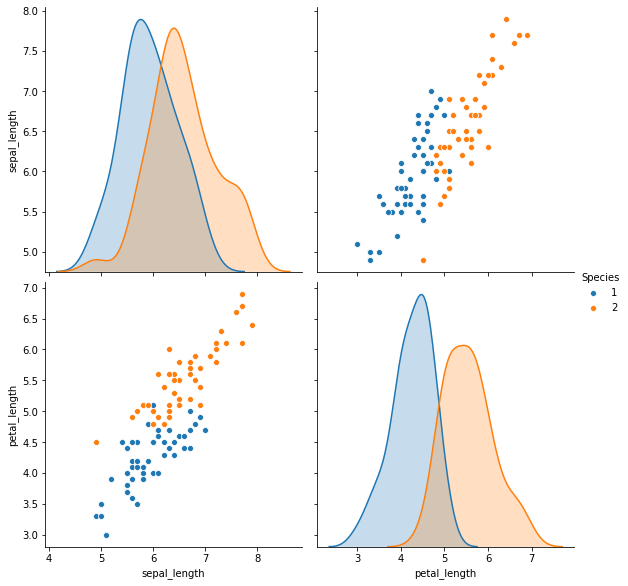

In [6]:
sns.pairplot(df, hue='Species', height=4)

## 2-2. 箱ひげ図

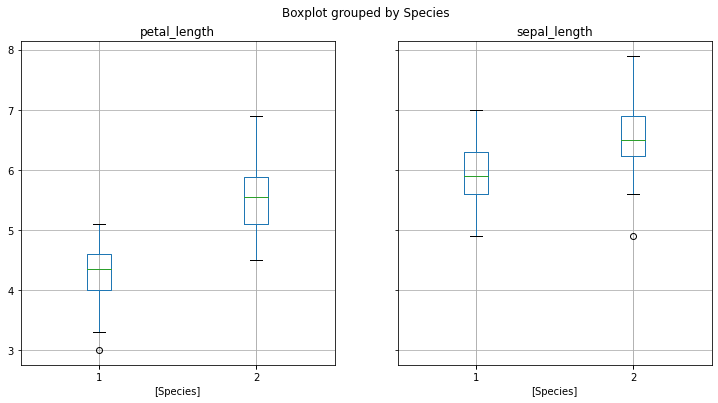

In [7]:
df.boxplot(by="Species", figsize=(12, 6))
plt.show()

## 2-3. バイオリン図

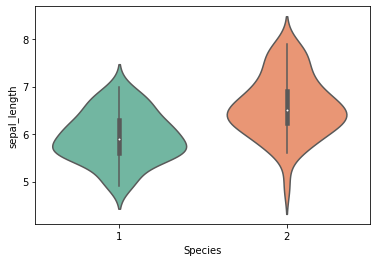

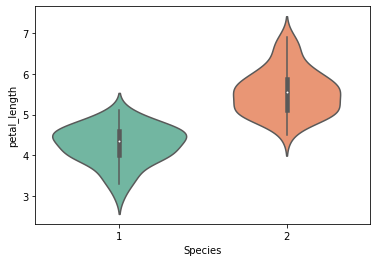

In [8]:
sns.violinplot(x="Species", y="sepal_length", data=df, palette="Set2")
plt.show()

sns.violinplot(x="Species", y="petal_length", data=df, palette="Set2")
plt.show()

# 【問題3】前処理・訓練データと検証データの分割

## 3-1. 検証データ分割

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:2].values # .values で df を ndarray に変換
y = df.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# 【問題4】前処理・標準化

## 4-1. sklearn StandardScaler 適用

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # 学習データのみで fit

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

print(X_train[:5]) # 中身確認
print(y_train[:5]) # ラベルは未処理

[[-0.43975642 -0.47061751]
 [ 0.64926302  0.97004834]
 [ 0.64926302  0.12965993]
 [-0.90647904 -0.83078398]
 [-1.06205325 -0.95083947]]
[1 2 1 1 1]


# 【問題5】学習と推定

## 5-1. KNN(k=5)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# 予測

y_pred_k5 = neigh5.predict(X_test)
y_pred_k5

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [13]:
# 答え

y_test

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

## 5-2. KNN(k=3)

In [14]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred_k3 = neigh3.predict(X_test)
y_pred_k3

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

## 5-3. KNN(k=1)

In [16]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
y_pred_k1 = neigh1.predict(X_test)
y_pred_k1

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1])

# 【問題6】評価

## 6-1. scikit-learnを使い4種類の指標を計算する

### 6-1-1. Accuracy（正解率）

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_k3)

0.92

### 6-1-2. Precision（適合率）

In [19]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred_k3)

0.9

### 6-1-3. Recall（再現率）

In [20]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_k3)

0.9

### 6-1-4. F-measure（F値）

In [21]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_k3)

0.9

## 6-2. 混同行列をscikit-learnを使い表示する

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_k3)

array([[ 9,  1],
       [ 1, 14]])

## 6-3. 4種類の指標値の意味について簡単に調査して文章でまとめる

### 6-3-1. Accuracy（正解率）
* 全てのデータのうち、正しく予測できた割合。
* 陽性・陰性の割合に偏りがあると、性能の良さを正しく評価できない。

$$
Accuracy = \frac{TP + TN}{TP + TN + FN + FP}
$$

### 6-3-2. Precision（適合率）
* 陽性と予測したもののうち、（本当に）陽性であった割合。
* 予測自体の信頼度。
* 再現率とはトレードオフの関係。

$$
Precision = \frac{TP}{TP + FP}
$$

### 6-3-3. Recall（再現率）
* 実際に陽性であるもののうち、陽性であると予測された割合。
* 陽性の発見率。
* 適合率と併用（全てが陽性という予測だと１となってしまい正しく評価されない）

$$
Recall = \frac{TP}{TP + FN}
$$

### 6-3-4. F-measure（F値）
* Recall と Precision の調和平均。
* この値が大きければ、Recall と Precision の両方が良いことを示す。

$$
F-measure = \frac{Recall * Precision}{Recall + Precision}
$$

# 【問題7】可視化

## 7-1. 決定領域の可視化

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

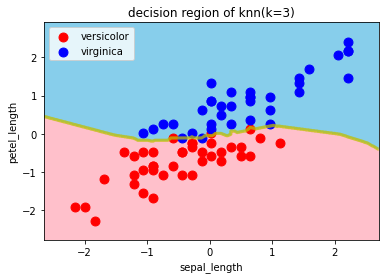

In [24]:
# 訓練データでプロット

X = X_train
y = y_train
model = neigh3

decision_region(X, y, model, title='decision region of knn(k=3)', xlabel='sepal_length', ylabel='petel_length')

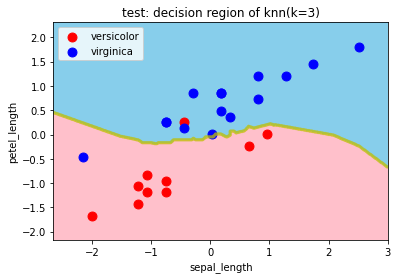

In [25]:
# 検証データでプロット

X = X_test
y = y_test
model = neigh3

decision_region(X, y, model, title='test: decision region of knn(k=3)', xlabel='sepal_length', ylabel='petel_length')

# 【問題8】他の手法の学習

## 8-1. 最近傍法

,Accuracy,Precision,Recall,F1
Score,0.92,0.9,0.9,0.9


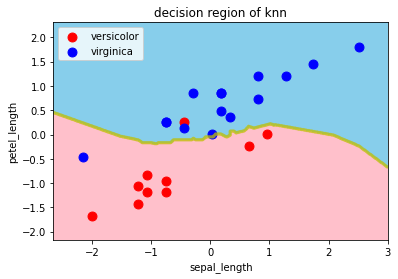

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# 学習
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# 推定
y_pred = neigh.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = neigh
decision_region(X, y, model, title='decision region of knn', xlabel='sepal_length', ylabel='petel_length')

* KNNの考察：
  + 評価はどの指標でも0.9以上と優秀
  + 分類もほぼ正確にできている

## 8-2. ロジスティック回帰

,Accuracy,Precision,Recall,F1
Score,0.88,0.818182,0.9,0.857143


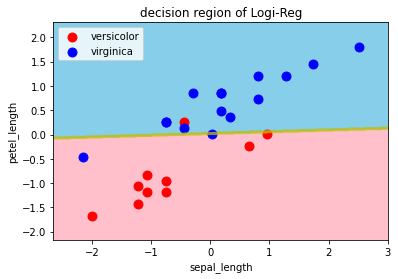

In [27]:
from sklearn.linear_model import LogisticRegression

# 学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of Logi-Reg', xlabel='sepal_length', ylabel='petel_length')

* ロジスティック回帰の考察：
  + Precisionが相対的に低めで、予測自体の信頼性は低めかと伺える
  + 決定境界が線形で、複雑な分類に対処できなさそうに見える

## 8-3. SVM

,Accuracy,Precision,Recall,F1
Score,0.92,0.9,0.9,0.9


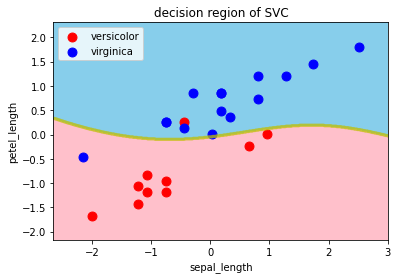

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 学習
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of SVC', xlabel='sepal_length', ylabel='petel_length')

* SVCの考察：
  + KNNと同等のスコア
  + KNNより決定境界が滑らかで、汎化性能は高めに思える

## 8-4. 決定木

,Accuracy,Precision,Recall,F1
Score,0.88,0.818182,0.9,0.857143


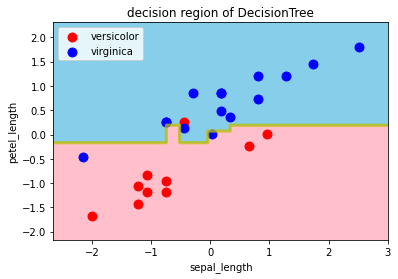

In [29]:
from sklearn.tree import DecisionTreeClassifier

# 学習
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of DecisionTree', xlabel='sepal_length', ylabel='petel_length')

* 決定木の考察：
  + Precision が相対的に低めに出ていて、予測自体の信頼性は低めか
  + 決定境界が粗く、複雑な分類に対処できなさそうに思える

## 8-5. ランダムフォレスト

,Accuracy,Precision,Recall,F1
Score,0.88,0.888889,0.8,0.842105


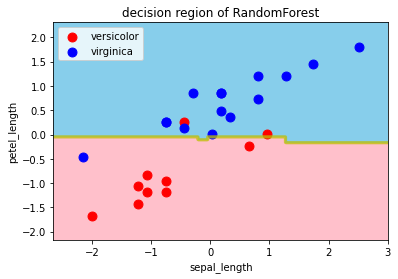

In [30]:
from sklearn.ensemble import RandomForestClassifier

# 学習
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of RandomForest', xlabel='sepal_length', ylabel='petel_length')

* ランダムフォレストの考察：
  + スコア自体はそれほど悪くはない
  + 決定境界がほぼ線形で且つ粗く、複雑な分類に対処できなさそうに思える

* 総括：
  + 今回のケースでは、最近傍法とSVMが検証データに対して全体的に良い指標値を出した。
  + ただし決定境界を見ると、最近傍法は少し過学習気味で、データ点が多くなると正しい分類が出来なくなる恐れがあるように思える。
  + 従って、今回はSVMが最も良いモデルと考えられる。
  + ただしハイパーパラメータ次第で、まだ結果が変わる余地は十分にある。

## 【問題9】（アドバンス課題）標準化の有無の比較

## 9-1. 未標準化データを用意

In [31]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

X = X[["sepal_length", "petal_length"]]
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
df = df[df.Species!=0]


# 訓練・検証データ分割 
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [32]:
# 中身確認

print(X_train[:5])

[[6.  4.5]
 [6.7 5.7]
 [6.7 5. ]
 [5.7 4.2]
 [5.6 4.1]]


## 9-2. モデルの適用

### 9-2-1. 最近傍法

,Accuracy,Precision,Recall,F1
Score,0.92,0.9,0.9,0.9


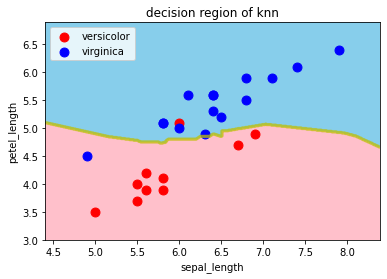

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# 学習
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# 推定
y_pred = neigh.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = neigh
decision_region(X, y, model, title='decision region of knn', xlabel='sepal_length', ylabel='petel_length')

### 9-2-2. ロジスティック回帰

,Accuracy,Precision,Recall,F1
Score,0.88,0.818182,0.9,0.857143


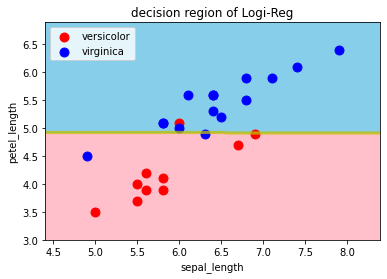

In [34]:
from sklearn.linear_model import LogisticRegression

# 学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of Logi-Reg', xlabel='sepal_length', ylabel='petel_length')

### 9-2-3. SVM

,Accuracy,Precision,Recall,F1
Score,0.92,0.9,0.9,0.9


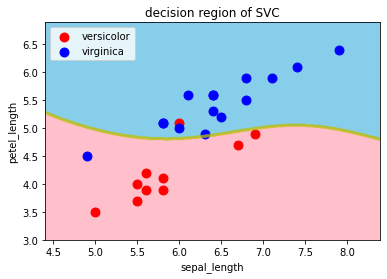

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 学習
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of SVC', xlabel='sepal_length', ylabel='petel_length')

### 9-2-4. 決定木

,Accuracy,Precision,Recall,F1
Score,0.88,0.818182,0.9,0.857143


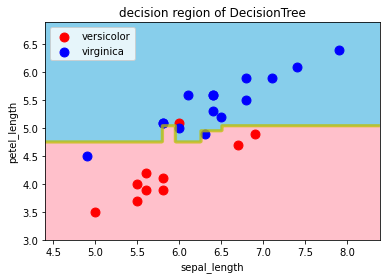

In [36]:
from sklearn.tree import DecisionTreeClassifier

# 学習
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of DecisionTree', xlabel='sepal_length', ylabel='petel_length')

### 9-2-5. ランダムフォレスト

,Accuracy,Precision,Recall,F1
Score,0.88,0.888889,0.8,0.842105


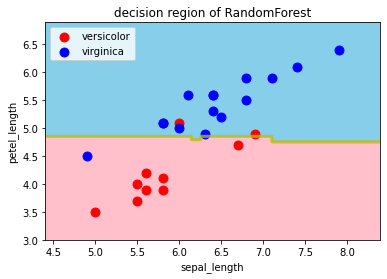

In [37]:
from sklearn.ensemble import RandomForestClassifier

# 学習
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of RandomForest', xlabel='sepal_length', ylabel='petel_length')

## 9-3. 考察

* 標準化は、本来変数間の単位やスケールが異なる場合、それらの尺度を合わせる処理の一つ。
* 具体的には、各変数の平均を０、標準偏差を１にする操作を行い、平均を$\mu$、標準偏差を$\sigma$とすると下の数式で表される。
$$
x' = \frac{x - \mu}{\sigma}
$$
* 今回のケースでは、特徴量の２変数間の単位やスケールに違いがないため、標準化済データの出力との差異がないものと思われる。

# 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

## 10-1. 多値分類データの用意

In [38]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
X = pd.DataFrame(data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

X = X[["sepal_length", "petal_length"]]
y = pd.DataFrame(data.target, columns=["Species"])
df = pd.concat([X, y], axis=1)


# 訓練・検証データ分割 
import numpy as np
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

## 10-2. 可視化用関数の修正

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    
    # setting
    scatter_color = ["green", 'red', 'blue']
    contourf_color = ["mediumspringgreen", 'pink', 'skyblue']
    n_class = 3
    
    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1,  y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1,  y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1] , s=80, color=scatter_color[i], label=target_names[i], marker='o')
        
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### 10-3. モデルの適用

### 10-3-1. 最近傍法

,Accuracy,Precision,Recall,F1
Score,0.921053,0.911111,0.921296,0.91511


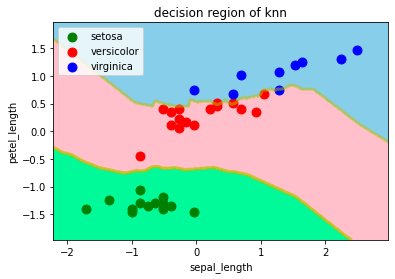

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# 学習
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# 推定
y_pred = neigh.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = neigh
decision_region(X, y, model, title='decision region of knn', xlabel='sepal_length', ylabel='petel_length')

### 10-3-2. ロジスティック回帰

,Accuracy,Precision,Recall,F1
Score,0.947368,0.942857,0.958333,0.947888


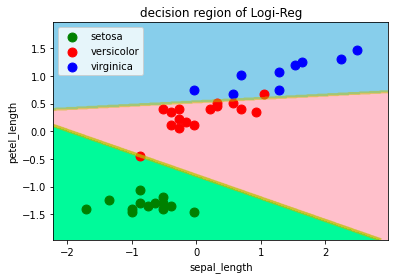

In [41]:
from sklearn.linear_model import LogisticRegression

# 学習
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of Logi-Reg', xlabel='sepal_length', ylabel='petel_length')

### 10-3-3. SVM

,Accuracy,Precision,Recall,F1
Score,0.973684,0.966667,0.979167,0.971703


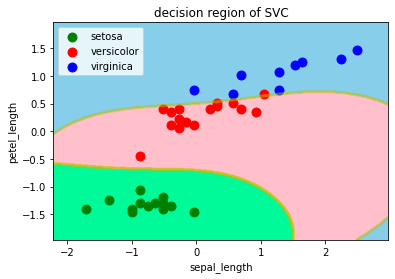

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 学習
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of SVC', xlabel='sepal_length', ylabel='petel_length')

### 10-3-4. 決定木

,Accuracy,Precision,Recall,F1
Score,0.973684,0.966667,0.979167,0.971703


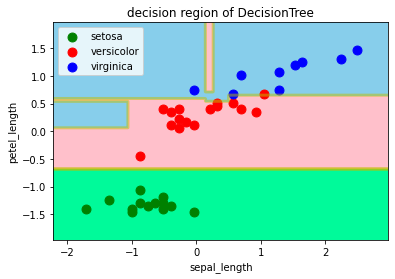

In [43]:
from sklearn.tree import DecisionTreeClassifier

# 学習
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)

# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of DecisionTree', xlabel='sepal_length', ylabel='petel_length')

### 10-3-5. ランダムフォレスト

,Accuracy,Precision,Recall,F1
Score,0.973684,0.966667,0.979167,0.971703


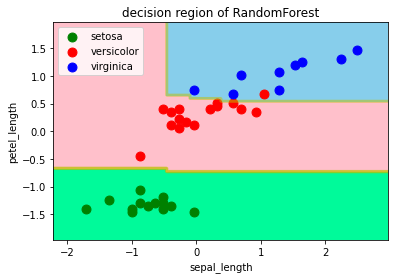

In [44]:
from sklearn.ensemble import RandomForestClassifier

# 学習
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# 推定
y_pred = clf.predict(X_test)

# 評価
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
eval_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1]}
df = pd.DataFrame(eval_dict, index=["Score"])
display(df)


# 可視化
X = X_test
y = y_test
model = clf
decision_region(X, y, model, title='decision region of RandomForest', xlabel='sepal_length', ylabel='petel_length')

* 考察：
  + 多値分類の評価指標においては、SVM・決定木・ランダムフィレストが高い精度を出した。
  + 決定境界については、決定木とランダムフォレストは直線で分離しているため、より多くのクラスを扱うNクラス分類問題においては精度を出しにくいように思える。
  + 従って、今回最も精度の高い手法はSVMだと考える。